In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

concrete = pd.read_csv("../contents/concrete_na.csv")
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1029 non-null   float64
 1   slag          1027 non-null   float64
 2   ash           1029 non-null   float64
 3   water         1029 non-null   float64
 4   superplastic  1023 non-null   float64
 5   coarseagg     1029 non-null   float64
 6   fineagg       1028 non-null   float64
 7   age           1029 non-null   float64
 8   strength      1028 non-null   float64
dtypes: float64(9)
memory usage: 72.6 KB


In [27]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


<Axes: >

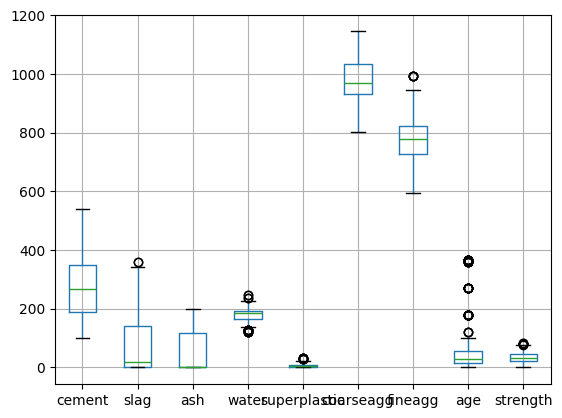

In [54]:
concrete.boxplot()

In [29]:
concrete.isnull().sum()

cement          1
slag            3
ash             1
water           1
superplastic    7
coarseagg       1
fineagg         2
age             1
strength        2
dtype: int64

In [30]:
# 결측치 모두 버리기
concrete.dropna(how="any", inplace=True)
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [31]:
# 중복치 확인 후 버리기
print(concrete.duplicated().sum())
concrete.drop_duplicates(inplace=True)
print(concrete.duplicated().sum())

25
0


In [32]:
#열의 쌍별 상관 관계를 계산
concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.304382,-0.386910,-0.054717,0.058847,-0.084472,-0.250971,0.085526,0.487184
slag,-0.304382,1.000000,-0.308340,0.126165,0.022254,-0.277370,-0.279648,-0.039941,0.104926
ash,-0.386910,-0.308340,1.000000,-0.282562,0.417508,-0.029946,0.084996,-0.160397,-0.078008
water,-0.054717,0.126165,-0.282562,1.000000,-0.645109,-0.210859,-0.439458,0.281448,-0.270947
superplastic,0.058847,0.022254,0.417508,-0.645109,1.000000,-0.245623,0.204990,-0.194369,0.343742
coarseagg,-0.084472,-0.277370,-0.029946,-0.210859,-0.245623,1.000000,-0.167429,-0.003993,-0.142433
fineagg,-0.250971,-0.279648,0.084996,-0.439458,0.204990,-0.167429,1.000000,-0.159767,-0.189746
age,0.085526,-0.039941,-0.160397,0.281448,-0.194369,-0.003993,-0.159767,1.000000,0.336860
strength,0.487184,0.104926,-0.078008,-0.270947,0.343742,-0.142433,-0.189746,0.336860,1.000000


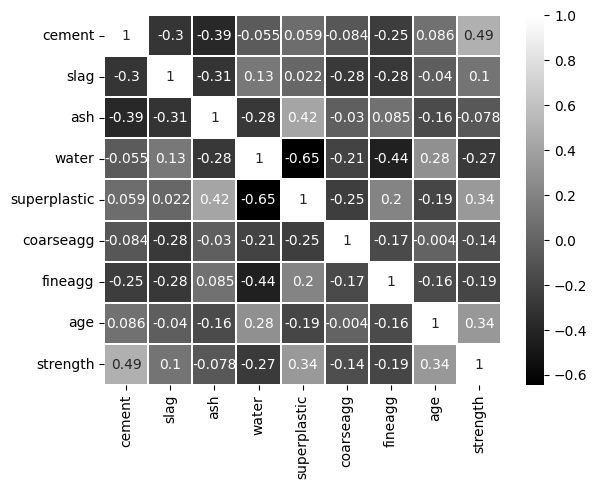

In [36]:
import seaborn as sns

sns.heatmap(concrete.corr(), annot=True, cmap="grey", linewidths=0.2, linecolor="white")
plt.show()

In [38]:
# input(feature)과 target을 통해 task를 정함
input = concrete.drop("strength", axis=1)
target = concrete["strength"]
print(input.shape, target.shape)

# train과 test를 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, shuffle=True) # shuffle : 큰 값과 작은 값을 섞기
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# scaling (기준은 train set)

(995, 8) (995,)
(796, 8) (199, 8) (796,) (199,)


## min-max, z-score scaling examples

In [42]:
# 최대 최소 스케일 함수
def minmax_normalize(arr):
    arr = np.array(arr)
    return (arr - arr.min()) / (arr.max() - arr.min())

print(minmax_normalize([1,2,3,4,5,6,7,8,9,10]))

# z스코어(표준편차) 스케일 함수
def zscore_standize(arr):
    arr = np.array(arr)
    return  (arr-arr.mean()) / arr.std()

print(zscore_standize([1,2,3,4,5,6,7,8,9,10]))

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]


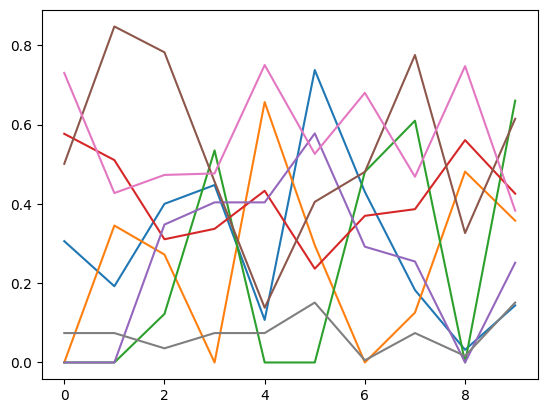

In [47]:
# scaling (기준은 train set)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()  #변환기
mms.fit(X_train)  #기준설정: 최소값, 최대값 설정
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)  #scaling(이동)

# x_train_mms의 8가지 column 중 첫 10개 데이터들을 가져온다.
for i in range(0, 8):
    plt.plot(X_train_mms[:10, i])

In [49]:
# linear regression model 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_mms, y_train)
print(lr.score(X_train_mms, y_train))
print(lr.score(X_test_mms, y_test))

0.612245056522404
0.5637448701239081


In [52]:
from sklearn.metrics import mean_absolute_error
print("절대 오차: ")
print(mean_absolute_error(y_test, lr.predict(X_test_mms))) # 실제값, 예측값
print("실제 값의 최대 최소 차이: ")
print(concrete["strength"].max() - concrete["strength"].min())

절대 오차: 
8.350283303044035
실제 값의 최대 최소 차이: 
80.27


In [53]:
lr.coef_

array([ 51.22686402,  34.73881529,  16.70520938, -18.78094916,
        10.18921447,   4.65883664,   6.50153567,  44.60740779])